# Libraries


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Exploring the data

In [50]:
df = pd.read_csv("twitter_training.csv")
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [51]:
game_count = df["Borderlands"].value_counts()
game_count

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [52]:
rate_count = df["Positive"].value_counts()
rate_count

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: Positive, dtype: int64

# Data cleaning

In [53]:
df.columns = ['EntryID', 'GameName', 'Sentiment', 'Text']
df

,EntryID,GameName,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [54]:
non_game_names = [
    'Microsoft', 'Verizon', 'Facebook', 'johnson & johnson', 'Amazon',
    'Home Depot', 'Xbox (X series)', 'PlayStation 5 (PS5)', 'Nvidia', 'Google'
]

In [55]:
df = df[~df['GameName'].isin(non_game_names)]
df

,EntryID,GameName,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt /...
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 3...
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Chok...


In [56]:
df.isna().sum()

EntryID        0
GameName       0
Sentiment      0
Text         531
dtype: int64

In [57]:
df = df.dropna()
df.isna().sum()

EntryID      0
GameName     0
Sentiment    0
Text         0
dtype: int64

In [58]:
df = df[~df["Sentiment"].isin(["Irrelevant"])]
df

,EntryID,GameName,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt /...
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 3...
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Chok...


# Data preproccesing

In [59]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
# Tokenization
def tokenize(text):
  return word_tokenize(text)

# Lowercasing
def convert_to_lowercase(token):
    lowercased_tokens = []
    for word in token:
        lowercased_tokens.append(word.lower())
    return lowercased_tokens

# Removing Stopwords
def remove_stop_words(token):
  stop_words = set(stopwords.words('english'))
  filtered_tokens = []
  for word in token:
    if word not in stop_words:
      filtered_tokens.append(word)
  return filtered_tokens

# Removing non alphabetic
def remove_non_alphabetic(token):
  alpha_tokens = []
  for word in token:
    if word.isalpha():
      alpha_tokens.append(word)
  return alpha_tokens

# Stemming
def stem_words(token):
  stemmer = PorterStemmer()
  stemmed_words = []
  for word in token:
    stemmed_word = stemmer.stem(word)
    stemmed_words.append(stemmed_word)
  return stemmed_words

def preprocess_text(text):
    tokens = tokenize(text)
    tokens = convert_to_lowercase(tokens)
    tokens = remove_stop_words(tokens)
    tokens = remove_non_alphabetic(tokens)
    tokens = stem_words(tokens)
    return tokens

In [61]:
# Apply preprocessing to the 'Text' column
df['Processed_Text'] = df['Text'].apply(preprocess_text)
df

,EntryID,GameName,Sentiment,Text,Processed_Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"[come, border, kill]"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, get, borderland, kill]"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, come, borderland, murder]"
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, get, borderland, murder]"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"[im, get, borderland, murder]"
...,...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt /...,"[tom, clanci, ghost, recon, choke, point]"
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 3...,"[tom, clanci, ghost, recon, choke, point]"
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH,"[tom, lin, ghost, recon, choke, point]"
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Chok...,"[tom, clanci, ghost, hous, recon, choke, point..."


# Visualization

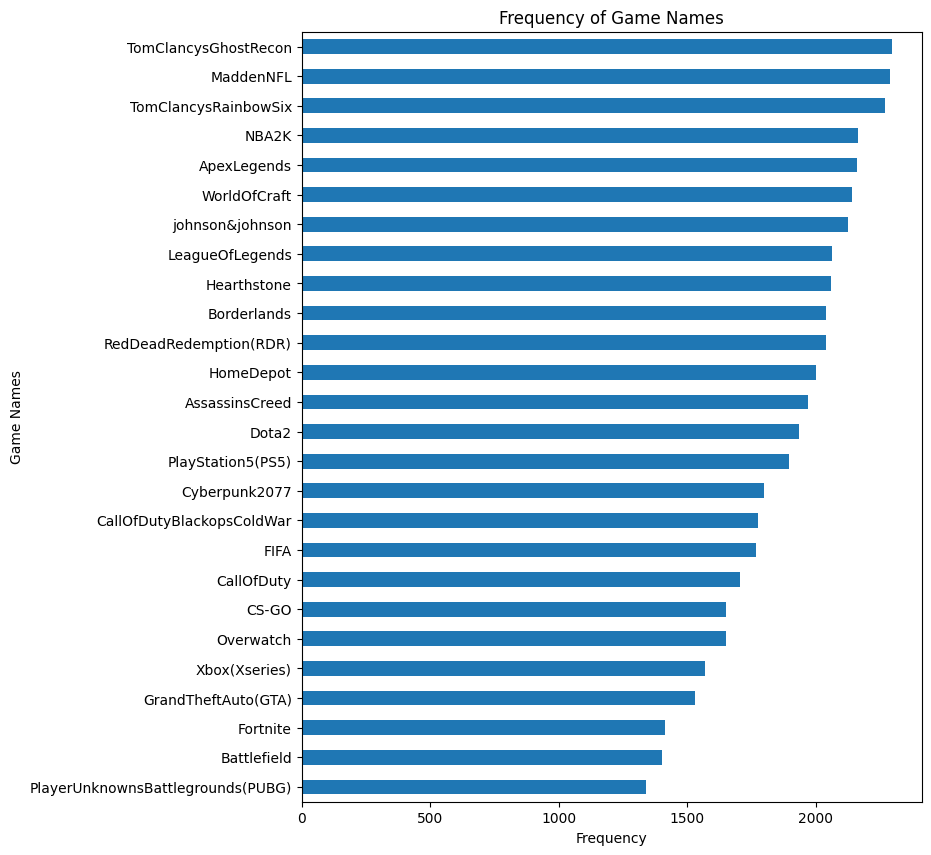

In [62]:
game_counts = df['GameName'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(8, 10))
game_counts.plot(kind='barh')
plt.title('Frequency of Game Names')
plt.ylabel('Game Names')
plt.xlabel('Frequency')
plt.show()

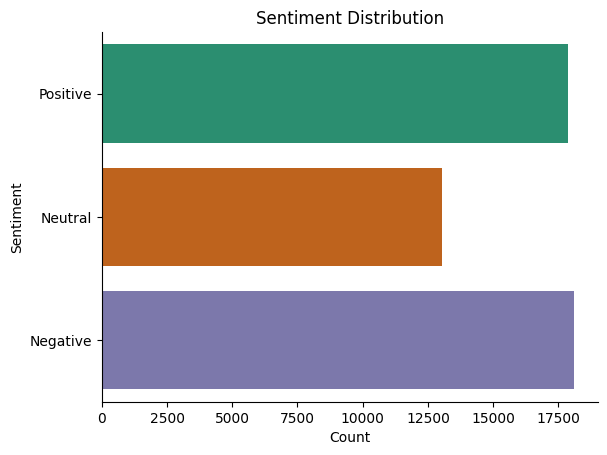

In [63]:
sns.countplot(y='Sentiment', data=df, palette='Dark2')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Word embedding

In [64]:
X = df['Processed_Text'].apply(lambda x: ' '.join(x))
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Naive bayes model

In [65]:
# Training a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Predicting on the test set
y_pred = nb_classifier.predict(X_test_vec)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


# Testing

In [73]:
new_text = "Minecraft is MY LIFE!"

processed_text = preprocess_text(new_text)

new_text_vec = vectorizer.transform([' '.join(processed_text)])

predicted_sentiment = nb_classifier.predict(new_text_vec)

print(f"Predicted Sentiment: {predicted_sentiment[0]}")

Predicted Sentiment: Positive
